In [1]:
%matplotlib inline

import pandas
import numpy
import sklearn
from sklearn import metrics, datasets, model_selection

import sys
sys.path.insert(0, 'build/lib.linux-x86_64-3.6/')
import naivebayes

In [2]:
np = numpy

def prob_ref(x, mean, std):
    exponent = np.exp(- ((x - mean)**2 / (2 * std**2)))
    return (exponent / (np.sqrt(2 * np.pi) * std))

# https://www.johndcook.com/blog/2010/04/29/simple-approximation-to-normal-distribution/
def prob_cos(x, mean, std):
    bs1 = 7.9 # fudge factor
    bs2 = 0.85 # fudge factor
    xm = (x - mean) / (std * bs2)
    xm = numpy.clip(xm, -numpy.pi, numpy.pi)
    s = (1 + numpy.cos(xm)) / 2*np.pi
    return 0.001 + s * 1/(std*bs1)

# FIXME: does not work at all??
def prob_logistic(x, mean, std):
    X = x + 2
    s = 1/(1 + numpy.exp((-0.07056*X**3) - (1.5976*X)))
    return s / 2.73

def prob_fixed(x, mean, std):
    return naivebayes.pdf_floatfixed(x, mean, std)
    #v = [ naivebayes.pdf_floatfixed(xx, mean, std) for xx in x]
    #return numpy.array(v)

def prob_fast(x, mean, std):
    return naivebayes.pdf_fast(x, mean, std)
    #v = [ naivebayes.pdf_fast(xx, mean, std) for xx in x]
    #return numpy.array(v)

def compare_p(mean=0.0, std=1.0, sigma=3.0):
    samples = numpy.linspace(mean-(sigma*std), mean+(sigma*std), 200)
    ref = prob_ref(samples, mean, std)
    cos = prob_cos(samples, mean, std)
    #logistic = prob_logistic(samples, mean, std)
    fixed = prob_fixed(samples, mean, std)
    fast = prob_fast(samples, mean, std)
    error = fixed - ref 
    df = pandas.DataFrame({
        'x': samples,
        'ref': ref,
        #'cos': cos,
        'fixed': fixed,
        'fast': fast,
        #'error': error,
        #'logistic': logistic,
    })
    df.plot(x='x', figsize=(4,4))

checks = ([-3.0, 0.0, 3.0, -30.0, 0.0, 30.0], [1.0, 1.0, 1.0, 100.1, 100.1, 100.1])
#checks = ([0.0], [1.0])
for mean, std in zip(*checks):
    compare_p(mean, std)

TypeError: pdf_floatfixed(): incompatible function arguments. The following argument types are supported:
    1. (arg0: float, arg1: float, arg2: float) -> float

Invoked with: array([-6.        , -5.96984925, -5.93969849, -5.90954774, -5.87939698,
       -5.84924623, -5.81909548, -5.78894472, -5.75879397, -5.72864322,
       -5.69849246, -5.66834171, -5.63819095, -5.6080402 , -5.57788945,
       -5.54773869, -5.51758794, -5.48743719, -5.45728643, -5.42713568,
       -5.39698492, -5.36683417, -5.33668342, -5.30653266, -5.27638191,
       -5.24623116, -5.2160804 , -5.18592965, -5.15577889, -5.12562814,
       -5.09547739, -5.06532663, -5.03517588, -5.00502513, -4.97487437,
       -4.94472362, -4.91457286, -4.88442211, -4.85427136, -4.8241206 ,
       -4.79396985, -4.7638191 , -4.73366834, -4.70351759, -4.67336683,
       -4.64321608, -4.61306533, -4.58291457, -4.55276382, -4.52261307,
       -4.49246231, -4.46231156, -4.4321608 , -4.40201005, -4.3718593 ,
       -4.34170854, -4.31155779, -4.28140704, -4.25125628, -4.22110553,
       -4.19095477, -4.16080402, -4.13065327, -4.10050251, -4.07035176,
       -4.04020101, -4.01005025, -3.9798995 , -3.94974874, -3.91959799,
       -3.88944724, -3.85929648, -3.82914573, -3.79899497, -3.76884422,
       -3.73869347, -3.70854271, -3.67839196, -3.64824121, -3.61809045,
       -3.5879397 , -3.55778894, -3.52763819, -3.49748744, -3.46733668,
       -3.43718593, -3.40703518, -3.37688442, -3.34673367, -3.31658291,
       -3.28643216, -3.25628141, -3.22613065, -3.1959799 , -3.16582915,
       -3.13567839, -3.10552764, -3.07537688, -3.04522613, -3.01507538,
       -2.98492462, -2.95477387, -2.92462312, -2.89447236, -2.86432161,
       -2.83417085, -2.8040201 , -2.77386935, -2.74371859, -2.71356784,
       -2.68341709, -2.65326633, -2.62311558, -2.59296482, -2.56281407,
       -2.53266332, -2.50251256, -2.47236181, -2.44221106, -2.4120603 ,
       -2.38190955, -2.35175879, -2.32160804, -2.29145729, -2.26130653,
       -2.23115578, -2.20100503, -2.17085427, -2.14070352, -2.11055276,
       -2.08040201, -2.05025126, -2.0201005 , -1.98994975, -1.95979899,
       -1.92964824, -1.89949749, -1.86934673, -1.83919598, -1.80904523,
       -1.77889447, -1.74874372, -1.71859296, -1.68844221, -1.65829146,
       -1.6281407 , -1.59798995, -1.5678392 , -1.53768844, -1.50753769,
       -1.47738693, -1.44723618, -1.41708543, -1.38693467, -1.35678392,
       -1.32663317, -1.29648241, -1.26633166, -1.2361809 , -1.20603015,
       -1.1758794 , -1.14572864, -1.11557789, -1.08542714, -1.05527638,
       -1.02512563, -0.99497487, -0.96482412, -0.93467337, -0.90452261,
       -0.87437186, -0.84422111, -0.81407035, -0.7839196 , -0.75376884,
       -0.72361809, -0.69346734, -0.66331658, -0.63316583, -0.60301508,
       -0.57286432, -0.54271357, -0.51256281, -0.48241206, -0.45226131,
       -0.42211055, -0.3919598 , -0.36180905, -0.33165829, -0.30150754,
       -0.27135678, -0.24120603, -0.21105528, -0.18090452, -0.15075377,
       -0.12060302, -0.09045226, -0.06030151, -0.03015075,  0.        ]), -3.0, 1.0

[ 0.36162073  1.81555899  2.64805783  0.03206603  0.07303982 -0.08126696
 -0.03015389  0.21203274]


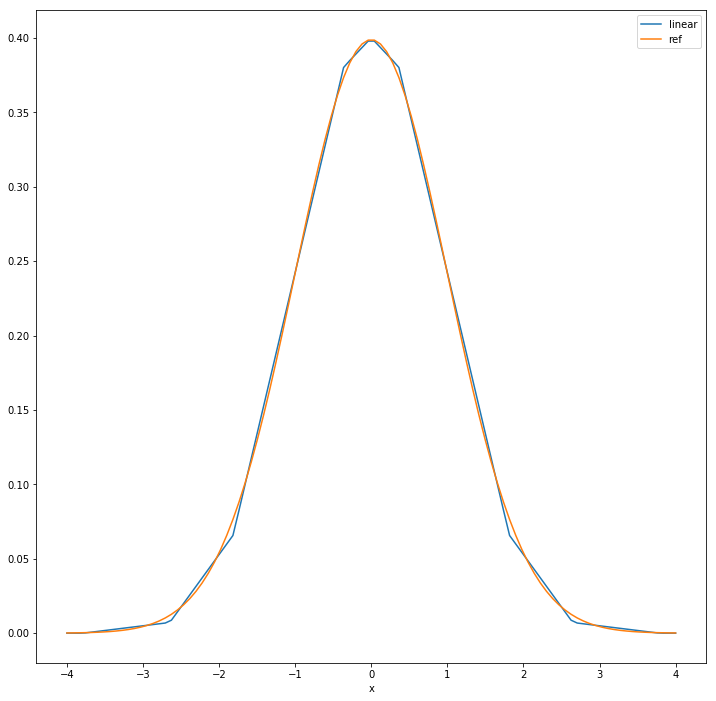

In [43]:
def piecewise_linear(x, x0, a, b, c):
    y = a*np.abs(x-x0) + b*x + c
    return y

def piecewise_linear2(x, x0, x1, aa, a, b, c):
    y = aa*np.abs(x-x1) + a*np.abs(x-x0) + b*x + c
    return y

def piecewise_linear3(x, x0, x1, x2, aaa, aa, a, b, c):
    y = aaa*np.abs(x-x2) + aa*np.abs(x-x1) + a*np.abs(x-x0) + b*x + c
    return y

def prob_linear(x, mean, stddev):
    xm = (x - mean) / std    
    if xm < 0:
        xm = -xm
    p = piecewise_linear3(xm, *popt_piecewise)
    #print(p)
    #return p
    if p > 0.4:
        return 0.4
    if p < 0.00001:
        return 0.00001
    return p
    
from scipy.optimize import curve_fit
fitx = numpy.linspace(0, 4, 30)
fity = prob_ref(fitx, 0.0, 1.0)
p0 = [0.5, 2.0, 3.14, 0, 0, 0, 0, 0]
popt_piecewise, pcov = curve_fit(piecewise_linear3, fitx, fity, p0=p0)
print(popt_piecewise)

points = numpy.linspace(-4, 4, 100)
df = pandas.DataFrame({
    'x': points,
    'ref': prob_ref(points, 0.0, 1.0),
    #'half': prob_half(points),
    'linear': [prob_linear(p, 0.0, 1.0) for p in points]
}).plot(x='x', figsize=(12,12))

In [8]:
class GaussianNB(object):
    def __init__(self):
        pass

    def fit(self, X, y):
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.model = np.array([np.c_[np.mean(i, axis=0), np.std(i, axis=0)] for i in separated])
        return self

    def _prob(self, x, mean, std):
        return np.log(prob_ref(x, mean, std))

    def predict_log_proba(self, X):            
        def class_probability(summaries, x):
            probs = [self._prob(i, *s) for s, i in zip(summaries, x)]
            ss = sum(probs)
            sss = numpy.sum(probs)
            return sss
                
        return [[ class_probability(s, x) for s in self.model] for x in X]

            
        #return [[  sum(self._prob(i, *s) for s, i in zip(summaries, x))
        #        for summaries in self.model] for x in X]

    def predict(self, X):
        n_classes, n_features, _ = self.model.shape
        model = list(numpy.ravel(self.model))
        self.classifier = naivebayes.Classifier(model, n_classes, n_features)

        cp = [ self.classifier.predict(x) for x in X ]
        pp = np.argmax(self.predict_log_proba(X), axis=1)
        print('predictions', cp, '\n', pp)
        return pp

    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)
    
class GaussianCos(GaussianNB):
    def _prob(self, x, mean, std):
        return np.log(prob_cos(x, mean, std))
    
class GaussianTaylor(GaussianNB):
    def _prob(self, x, mean, std):
        return np.log(prob_taylor(x, mean, std))
    
class GaussianFixed(GaussianNB):
    def _prob(self, x, mean, std):
        return np.log(prob_fixed(x, mean, std))
    
class GaussianFast(GaussianNB):
    def _prob(self, x, mean, std):
        return np.log(prob_fast(x, mean, std))
    
class GaussianLinear(GaussianNB):
    def _prob(self, x, mean, std):
        return np.log(prob_linear(x, mean, std))
    

In [9]:
# Data
data = datasets.load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

S = model_selection.train_test_split(features, labels, test_size=0.33, random_state=42)
train, test, train_labels, test_labels = S
classifiers = [
    GaussianNB(),
    #GaussianFast(),
    #GaussianCos(),
    #GaussianFixed(),
    #GaussianLinear(),
]
acc = []
for estimator in classifiers:
    # Train
    s  = StandardScaler()
    gnb = estimator
    train = s.fit_transform(train)
    model = gnb.fit(train, train_labels)
    #print(model.model.shape, train.shape)
    #print(model.model)
    # Tests
    test = s.transform(test)
    preds = gnb.predict(test)
    acc.append(metrics.accuracy_score(test_labels, preds))

print(acc)

predictions [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
 [1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 0 1]
[0.9308510638297872]
